In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
from skimage.filters import median
from skimage import io
from skimage.filters import gaussian

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


c:\Users\matth\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


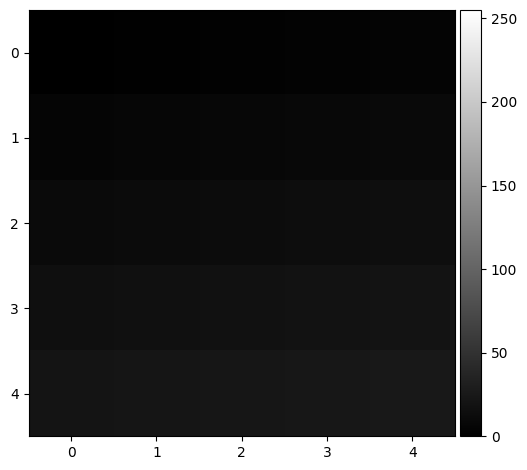

In [66]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)
io.imshow(input_img, cmap='gray', vmin=0, vmax=255)



In [67]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]

res_img = correlate(input_img, weights)

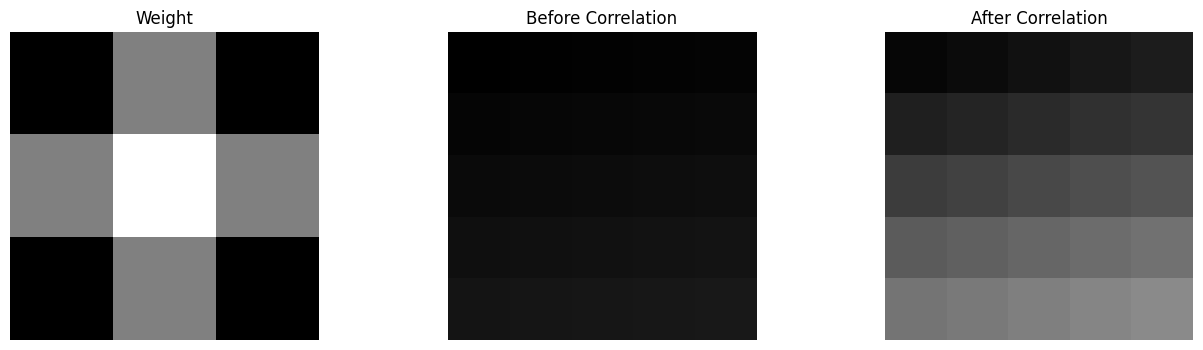

In [68]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

ax0.imshow(weights, cmap='gray')
ax0.axis('off')
ax0.set_title('Weight')

ax1.imshow(input_img, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.set_title('Before Correlation')

ax2.imshow(res_img, cmap='gray', vmin=0, vmax=255)
ax2.axis('off')
ax2.set_title('After Correlation')

io.show()

#### Exercise 1
Print the value in position (3, 3) in res_img. Explain the value?

This value is obtained by multiplying the 3x3 weight kernel element wise with the pixels centered around res_img[3][3]

In [69]:
print(res_img[3][3])
val = 13 + 17 + 2*18 + 19 + 23
assert (val == res_img[3][3])

108


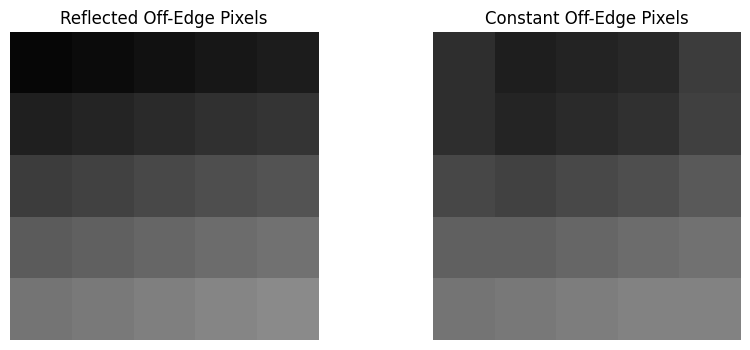

In [70]:
res_img_const = correlate(input_img, weights, mode="constant", cval=20)
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

ax0.imshow(res_img, cmap='gray', vmin=0, vmax=255)
ax0.axis('off')
ax0.set_title('Reflected Off-Edge Pixels')

ax1.imshow(res_img_const, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.set_title('Constant Off-Edge Pixels')

io.show()

#### Exercise 2
Compare the output images when using reflection and constant for the border. Where and why do you see the differences.

Differences only appear at image borders. Constant off-edge filtered image results can darken or lighten borders depending on the sign of the selected value.

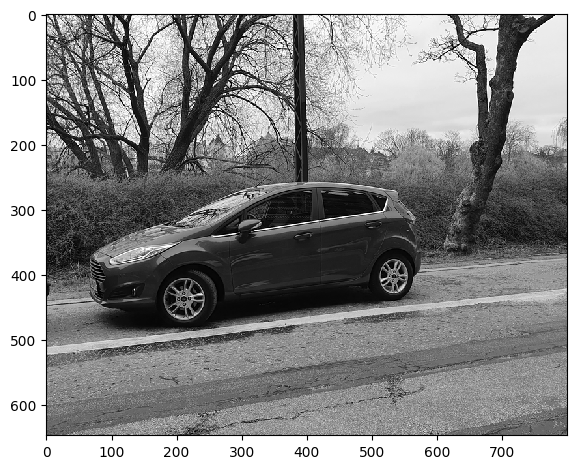

In [71]:
from skimage.color import rgb2gray

# Directory containing data and images
in_dir = "data/"
im_name = "Gaussian.png"
im_org = (io.imread(in_dir + im_name))
im_sp = (io.imread(in_dir + 'SaltPepper.png'))
im_car = rgb2gray(io.imread(in_dir + 'car.png'))
io.imshow(im_car)

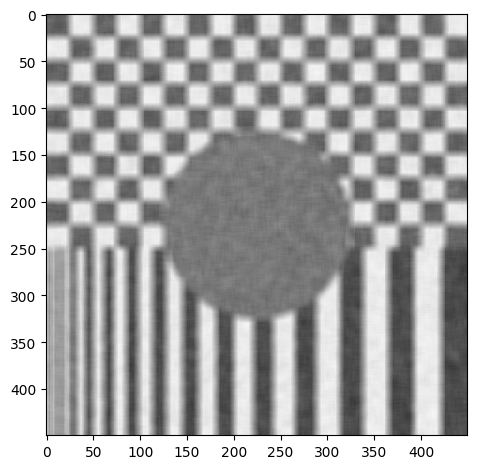

In [72]:
size = 10
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)
im_mean = correlate(im_org, weights)
io.imshow(im_mean)

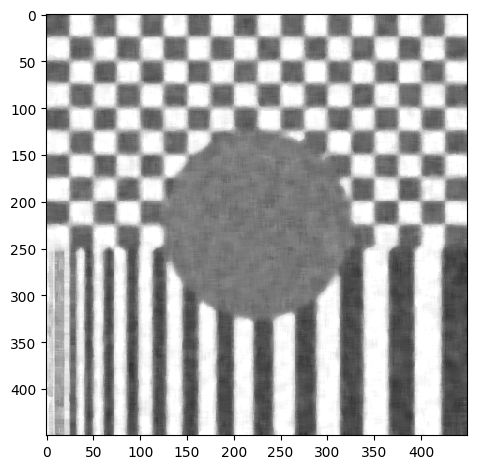

In [73]:
size = 10
# Two dimensional filter filled with 1
footprint = np.ones([size, size])
im_med = median(im_org, footprint)
io.imshow(im_med)

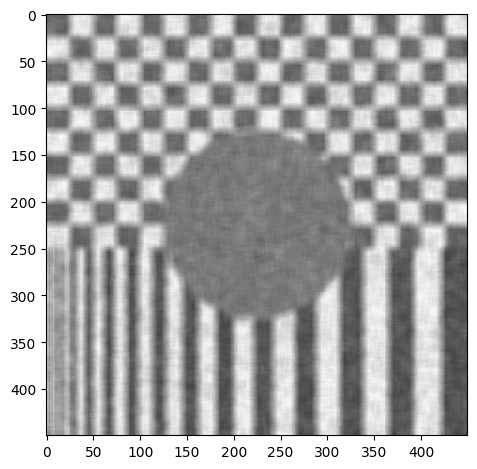

In [74]:
im_mean_sp = correlate(im_sp, weights)
im_med_sp = median(im_sp, footprint)

io.imshow(im_mean_sp)

### Comparing mean and median filters
The median filter removes noise while producing much sharper boundaries at dark to light transitions. The median filter also performs much better at removing salt and pepper noise as noisy pixel values do not pollute the values of valid pixel data.

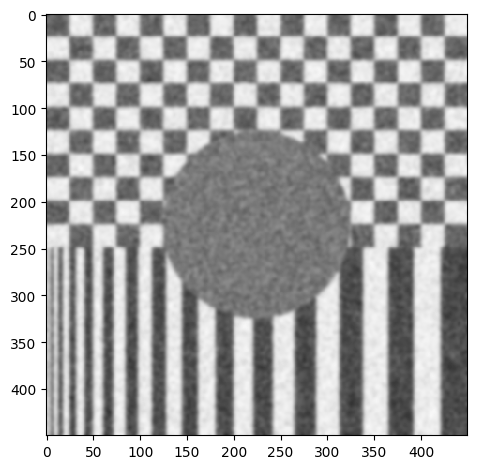

In [75]:
sigma = 2
gauss_img = gaussian(im_org, sigma)
io.imshow(gauss_img)

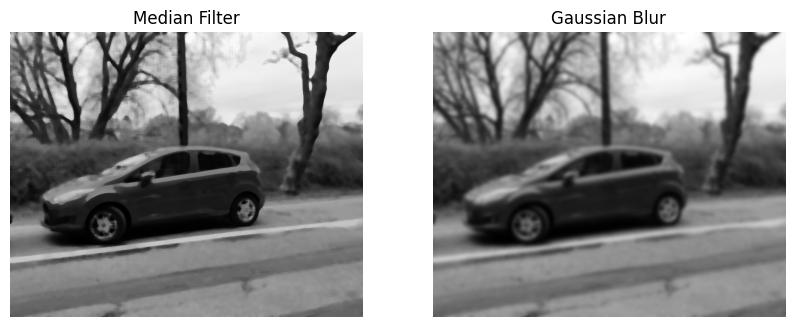

In [89]:
size = 10
# Two dimensional filter filled with 1
footprint = np.ones([size, size])
im_med_car = median(im_car, footprint)

sigma = 4
im_gauss_car = gaussian(im_car, sigma)

fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

ax0.imshow(im_med_car, cmap='gray')
ax0.axis('off')
ax0.set_title('Median Filter')

ax1.imshow(im_gauss_car, cmap='gray')
ax1.axis('off')
ax1.set_title('Gaussian Blur')

io.show()

Note: Light-dark transitions are sharper when applying a median filter compared to a Gaussian filter